In [1]:
import numpy as np
import copy as cp
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
import os
import thermal_evolution as te


In [2]:
repo=os.environ['LYA_EMU_REPO']
data_filename = repo+'/setup_simulations/IGM_data/256suite_IGM_tables.txt'

thermal_evolution_instance = te.MPGadgetThermalEvolution(data_filename)


In [3]:
#Checks
print(thermal_evolution_instance.input_parameters.shape)
print(np.max(thermal_evolution_instance.input_parameters, axis=0))
print(np.min(thermal_evolution_instance.input_parameters, axis=0))


(50, 4)
[49.     2.973  1.47  15.895]
[ 0.     0.327 -1.47   5.605]


In [4]:
thermal_evolution_instance.train_interpolator(2., use_parameter=[False, True, True, True])
#thermal_evolution_instance.train_interpolator(2., use_parameter=[False, True, True, True])


In [5]:
T0_range, gamma_range, filtering_length_range = [3000., 15000.]*u.K , [0.7, 1.7]*u.dimensionless_unscaled, [40., 130.]*u.kpc
#T0_range, gamma_range, filtering_length_range = [6000., 12600.]*u.K , [0.88, 1.47]*u.dimensionless_unscaled, [40., 130.]*u.kpc
#T0_range, gamma_range, filtering_length_range = [6000., 12600.]*u.K , [0.88, 1.47]*u.dimensionless_unscaled, [80.,]*u.kpc

for T0 in T0_range:
    for gamma in gamma_range:
        for filtering_length in filtering_length_range:
            print(T0, gamma, filtering_length)
            print('A =', thermal_evolution_instance.predict_A([T0.value, gamma.value, filtering_length.value]))
            print('B =', thermal_evolution_instance.predict_B([T0.value, gamma.value, filtering_length.value]))


3000.0 K 0.7 40.0 kpc
A = 0.3865324745285923
B = -1.7883786879303791
3000.0 K 0.7 130.0 kpc
A = 1.7834182708678137
B = -0.5330539071199176
3000.0 K 1.7 40.0 kpc
A = 0.12071092543894846
B = -0.059133575963597806
3000.0 K 1.7 130.0 kpc
A = 0.741026107427404
B = 0.6089813009478053
15000.0 K 0.7 40.0 kpc
A = 2.6393998244195007
B = -1.8266388994126412
15000.0 K 0.7 130.0 kpc
A = 3.34300818217666
B = -0.6332014920423061
15000.0 K 1.7 40.0 kpc
A = 1.5899246694966616
B = -0.27853841888980524
15000.0 K 1.7 130.0 kpc
A = 2.216043205879448
B = 0.49332874501173674


In [6]:
plot_grid_shape = (100, 100)

plot_grid_T0 = np.linspace(3000., 30000., num=plot_grid_shape[0]) * u.K
plot_grid_gamma = np.linspace(0.5, 2.5, num=plot_grid_shape[0]) * u.dimensionless_unscaled
plot_grid_filtering = np.linspace(20., 130., num=plot_grid_shape[0]) * u.kpc
plot_grid_mean_flux = np.linspace(0.1, 0.6, num=plot_grid_shape[0]) * u.dimensionless_unscaled

plot_grid_T0_fixed = np.ones(plot_grid_shape) #T0
plot_grid_gamma_fixed = np.ones(plot_grid_shape) #gamma
plot_grid_filtering_fixed = np.ones(plot_grid_shape) #filtering_length
plot_grid_mean_flux = np.ones(plot_grid_shape) #mean_flux


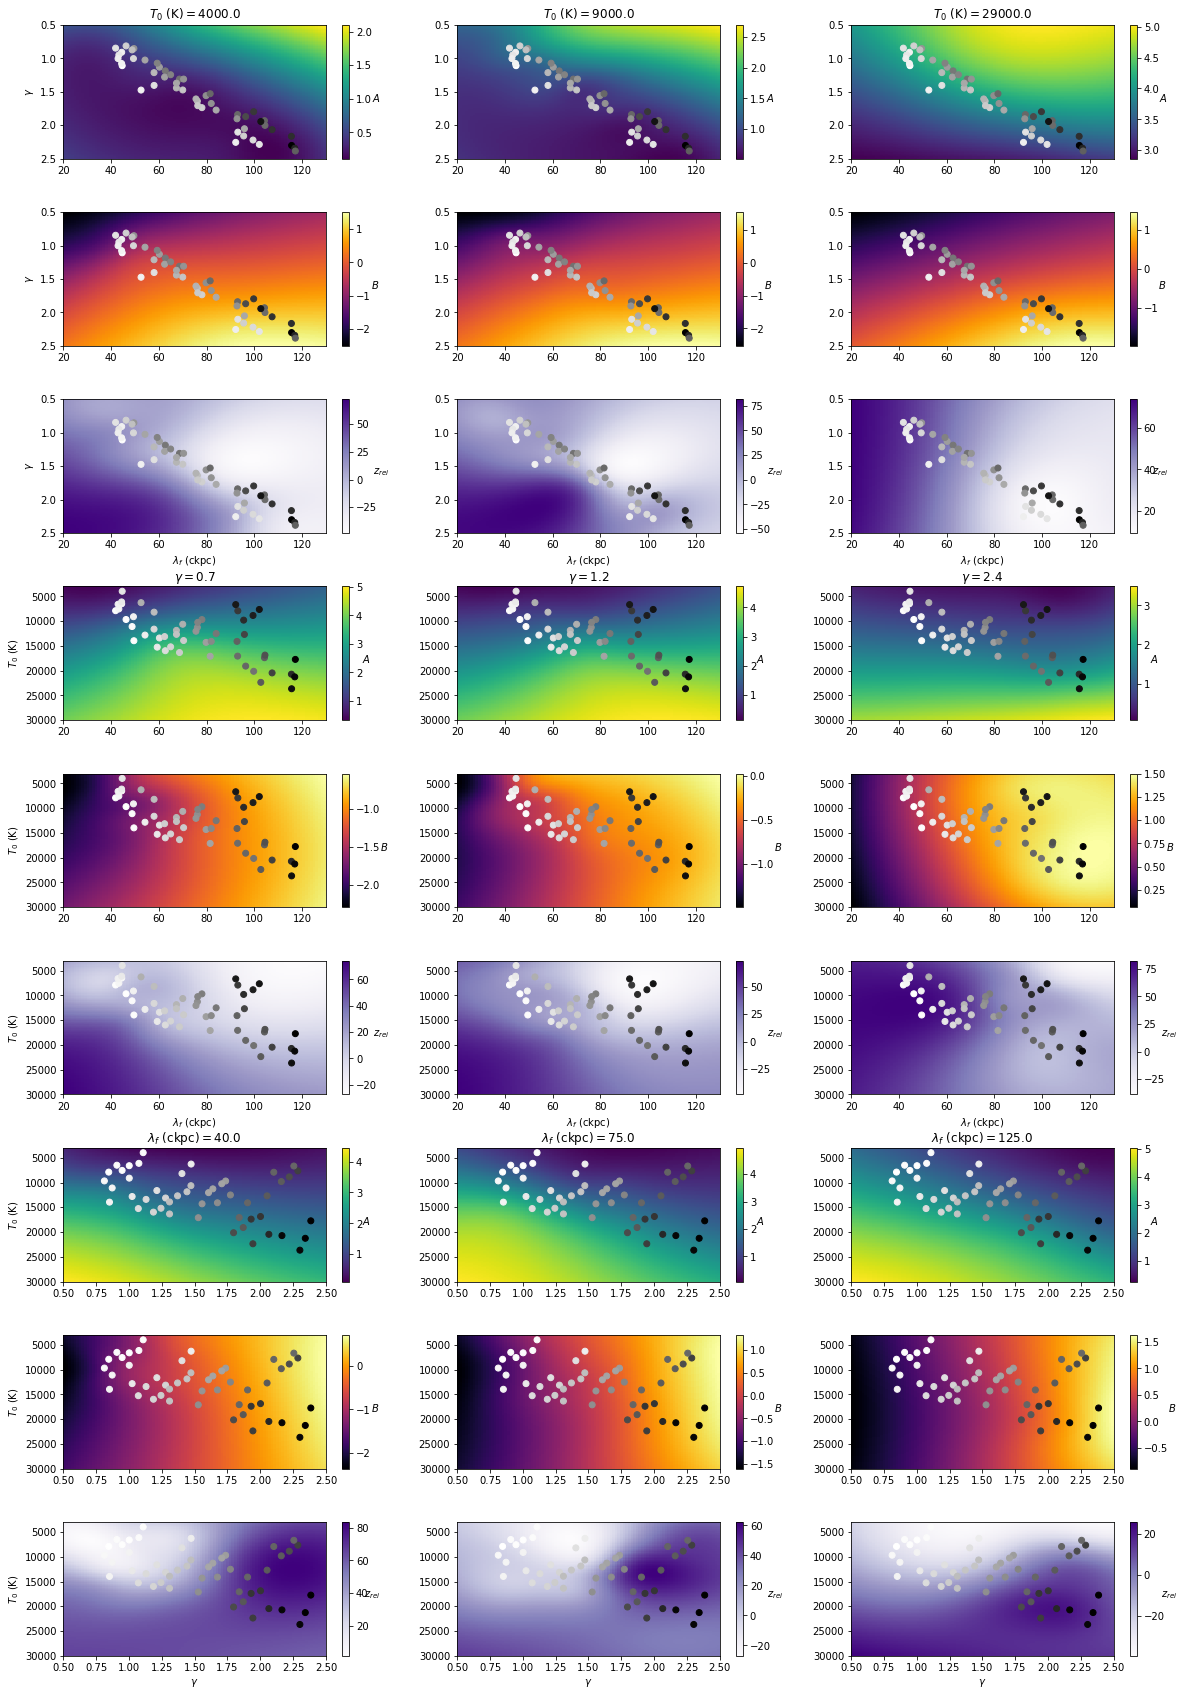

In [7]:
thermal_parameter_labels = [r'$T_0$ (K)', r'$\gamma$', r'$\lambda_f$ (ckpc)']
thermal_parameters_fixed_values = np.array([[4000., 9000., 29000.], [0.7, 1.2, 2.4], [40., 75., 125.]])
plot_grid_list = [plot_grid_T0.value, plot_grid_gamma.value, plot_grid_filtering.value]
n_sub_rows = 3

fig, axes = plt.subplots(nrows=len(plot_grid_list)*n_sub_rows, ncols=3, figsize=[20., 30.])
plt.subplots_adjust(hspace=0.4)

for i in range(len(plot_grid_list)):
    for j in range(axes.shape[1]):
        for k in range(3):
            parameter_indices_that_vary = np.delete(np.arange(len(plot_grid_list)), i).astype(np.int)
            plot_grid_list_with_fixed_value = cp.deepcopy(plot_grid_list)
            plot_grid_list_with_fixed_value[i] = np.ones(plot_grid_shape) * thermal_parameters_fixed_values[i, j]
            plot_grid_list_with_fixed_value[parameter_indices_that_vary[0]] = plot_grid_list_with_fixed_value[parameter_indices_that_vary[0]][:, np.newaxis] * np.ones(plot_grid_shape)
            plot_grid_list_with_fixed_value[parameter_indices_that_vary[1]] = plot_grid_list_with_fixed_value[parameter_indices_that_vary[1]][np.newaxis, :] * np.ones(plot_grid_shape)

            if k == 0:
                im0 = axes[i * n_sub_rows, j].imshow(thermal_evolution_instance.predict_A(plot_grid_list_with_fixed_value), aspect='auto',
                                      extent=[np.min(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[0]]), np.min(plot_grid_list[parameter_indices_that_vary[0]])])
                cbar0 = fig.colorbar(im0, ax=axes[i * n_sub_rows, j])
                cbar0.set_label(r'$A$', rotation=0)

                scat0 = axes[i * n_sub_rows, j].scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[1]],
                                      thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[0]],
                                      c=thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, i], cmap='Greys') #, norm=True)

                axes[i * n_sub_rows, j].set_title(thermal_parameter_labels[i] + r'$= %.1f$'%thermal_parameters_fixed_values[i, j])

            if k == 1:
                im1 = axes[i * n_sub_rows + 1, j].imshow(thermal_evolution_instance.predict_B(plot_grid_list_with_fixed_value), aspect='auto',
                                      extent=[np.min(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[0]]), np.min(plot_grid_list[parameter_indices_that_vary[0]])],
                                               cmap='inferno')
                cbar1 = fig.colorbar(im1, ax=axes[i * n_sub_rows + 1, j])
                cbar1.set_label(r'$B$', rotation=0)

                axes[i * n_sub_rows + 1, j].scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[1]],
                                      thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[0]],
                                           c=thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, i], cmap='Greys')

                #axes[i * n_sub_rows + 1, j].set_xlabel(thermal_parameter_labels[parameter_indices_that_vary[1]])

            if k == 2:
                im2 = axes[i * n_sub_rows + 2, j].imshow(thermal_evolution_instance.predict_z_reionisation(plot_grid_list_with_fixed_value), aspect='auto',
                                      extent=[np.min(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[0]]), np.min(plot_grid_list[parameter_indices_that_vary[0]])],
                                               cmap='Purples')
                cbar2 = fig.colorbar(im2, ax=axes[i * n_sub_rows + 2, j])
                cbar2.set_label(r'$z_{rei}$', rotation=0)

                axes[i * n_sub_rows + 2, j].scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[1]],
                                      thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[0]],
                                           c=thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, i], cmap='Greys')

                axes[i * n_sub_rows + 2, j].set_xlabel(thermal_parameter_labels[parameter_indices_that_vary[1]])

        if j == 0:
            axes[i * n_sub_rows, j].set_ylabel(thermal_parameter_labels[parameter_indices_that_vary[0]])
            axes[i * n_sub_rows + 1, j].set_ylabel(thermal_parameter_labels[parameter_indices_that_vary[0]])
            axes[i * n_sub_rows + 2, j].set_ylabel(thermal_parameter_labels[parameter_indices_that_vary[0]])
#cbar_scat0 = fig.colorbar(scat0, ax=axes[i * n_sub_rows + 2, j], orientation='horizontal')
#cbar_scat0.set_label(thermal_parameter_labels[i], rotation=0)
#axes[i * n_sub_rows + 2, j].axis('off')


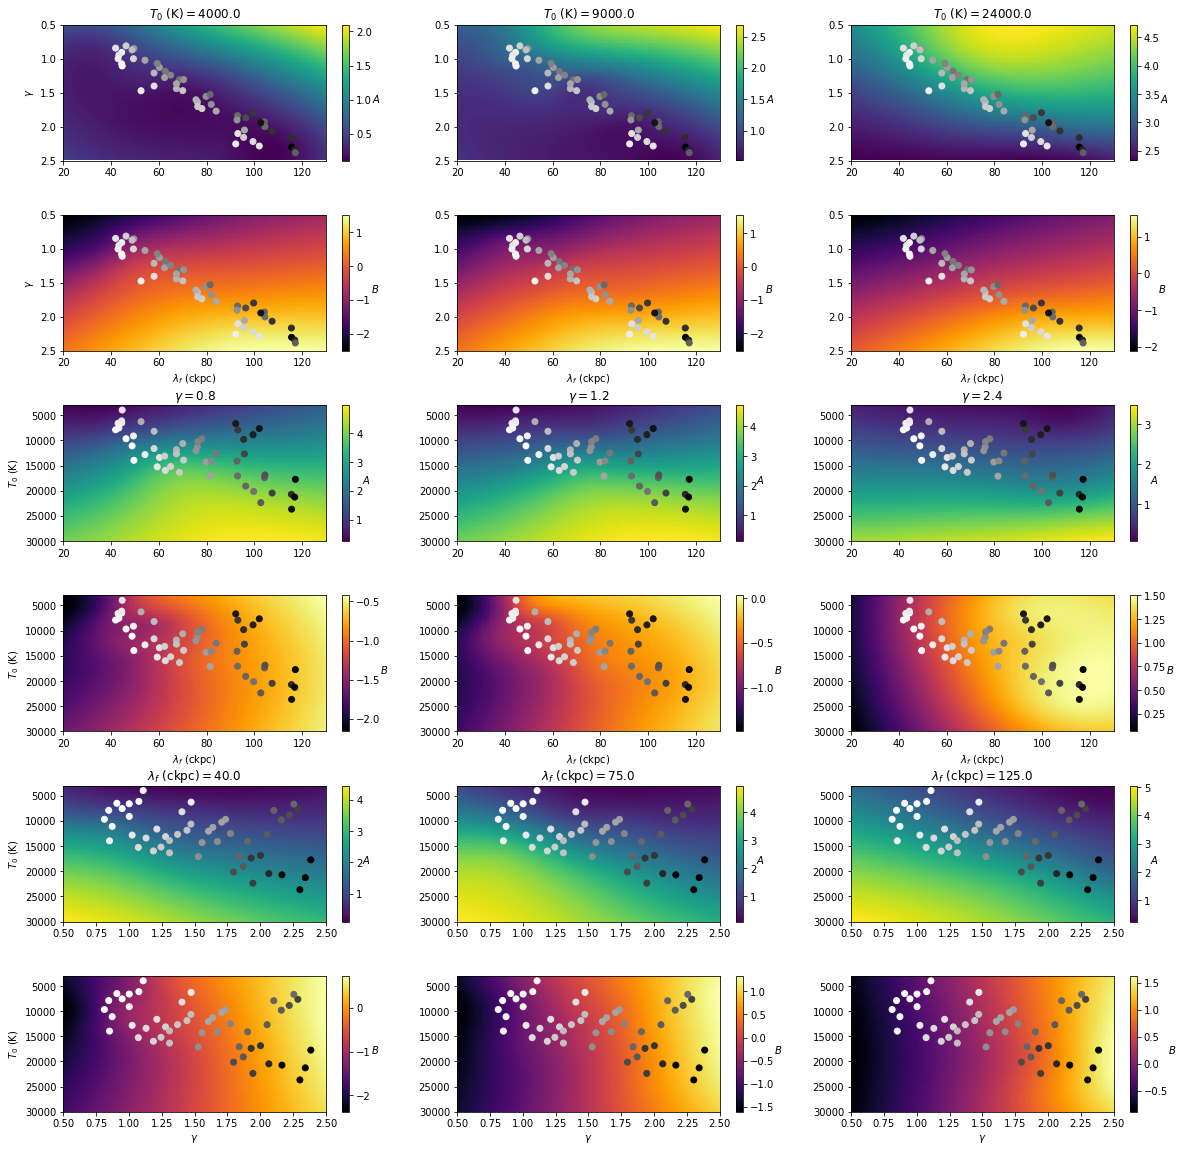

In [8]:
thermal_parameter_labels = [r'$T_0$ (K)', r'$\gamma$', r'$\lambda_f$ (ckpc)']
thermal_parameters_fixed_values = np.array([[4000., 9000., 24000.], [0.8, 1.2, 2.4], [40., 75., 125.]])
plot_grid_list = [plot_grid_T0.value, plot_grid_gamma.value, plot_grid_filtering.value]
n_sub_rows = 2

fig, axes = plt.subplots(nrows=len(plot_grid_list)*n_sub_rows, ncols=3, figsize=[20., 20.])
plt.subplots_adjust(hspace=0.4)

for i in range(len(plot_grid_list)):
    for j in range(axes.shape[1]):
        for k in range(2):
            parameter_indices_that_vary = np.delete(np.arange(len(plot_grid_list)), i).astype(np.int)
            plot_grid_list_with_fixed_value = cp.deepcopy(plot_grid_list)
            plot_grid_list_with_fixed_value[i] = np.ones(plot_grid_shape) * thermal_parameters_fixed_values[i, j]
            plot_grid_list_with_fixed_value[parameter_indices_that_vary[0]] = plot_grid_list_with_fixed_value[parameter_indices_that_vary[0]][:, np.newaxis] * np.ones(plot_grid_shape)
            plot_grid_list_with_fixed_value[parameter_indices_that_vary[1]] = plot_grid_list_with_fixed_value[parameter_indices_that_vary[1]][np.newaxis, :] * np.ones(plot_grid_shape)

            if k == 0:
                im0 = axes[i * n_sub_rows, j].imshow(thermal_evolution_instance.predict_A(plot_grid_list_with_fixed_value), aspect='auto',
                                      extent=[np.min(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[0]]), np.min(plot_grid_list[parameter_indices_that_vary[0]])])
                cbar0 = fig.colorbar(im0, ax=axes[i * n_sub_rows, j])
                cbar0.set_label(r'$A$', rotation=0)

                scat0 = axes[i * n_sub_rows, j].scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[1]],
                                      thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[0]],
                                      c=thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, i], cmap='Greys') #, norm=True)

                axes[i * n_sub_rows, j].set_title(thermal_parameter_labels[i] + r'$= %.1f$'%thermal_parameters_fixed_values[i, j])

            if k == 1:
                im1 = axes[i * n_sub_rows + 1, j].imshow(thermal_evolution_instance.predict_B(plot_grid_list_with_fixed_value), aspect='auto',
                                      extent=[np.min(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[0]]), np.min(plot_grid_list[parameter_indices_that_vary[0]])],
                                               cmap='inferno')
                cbar1 = fig.colorbar(im1, ax=axes[i * n_sub_rows + 1, j])
                cbar1.set_label(r'$B$', rotation=0)

                axes[i * n_sub_rows + 1, j].scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[1]],
                                      thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[0]],
                                           c=thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, i], cmap='Greys')

                axes[i * n_sub_rows + 1, j].set_xlabel(thermal_parameter_labels[parameter_indices_that_vary[1]])

        if j == 0:
            axes[i * n_sub_rows, j].set_ylabel(thermal_parameter_labels[parameter_indices_that_vary[0]])
            axes[i * n_sub_rows + 1, j].set_ylabel(thermal_parameter_labels[parameter_indices_that_vary[0]])
#cbar_scat0 = fig.colorbar(scat0, ax=axes[i * n_sub_rows + 2, j], orientation='horizontal')
#cbar_scat0.set_label(thermal_parameter_labels[i], rotation=0)
#axes[i * n_sub_rows + 2, j].axis('off')
